In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/databases/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df=df[['Age','Gender','MaritalStatus','Education','DistanceFromHome','EnvironmentSatisfaction','JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 'PercentSalaryHike', 'PerformanceRating','TotalWorkingYears','WorkLifeBalance']]

In [ ]:
df.isnull().sum()

Age                        0
Gender                     0
MaritalStatus              0
Education                  0
DistanceFromHome           0
EnvironmentSatisfaction    0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MonthlyIncome              0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
WorkLifeBalance            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Gender                   1470 non-null   object
 2   MaritalStatus            1470 non-null   object
 3   Education                1470 non-null   int64 
 4   DistanceFromHome         1470 non-null   int64 
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   JobInvolvement           1470 non-null   int64 
 7   JobLevel                 1470 non-null   int64 
 8   JobSatisfaction          1470 non-null   int64 
 9   MonthlyIncome            1470 non-null   int64 
 10  PercentSalaryHike        1470 non-null   int64 
 11  PerformanceRating        1470 non-null   int64 
 12  TotalWorkingYears        1470 non-null   int64 
 13  WorkLifeBalance          1470 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 16

In [ ]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2}).astype(int)
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,'Married': 1, 'Divorced': 2}).astype(int)

In [ ]:
bins = [18, 30, 40, 50, 60]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=['18-30', '31-40', '41-50', '51-60'])
df = df.dropna(subset=['Age Group'])
df = df[df['Age Group'].isin(['18-30', '31-40', '41-50', '51-60'])]
df['Age Group'] = df['Age Group'].map({'18-30': 1, '31-40': 2, '41-50': 3, '51-60': 4}).astype(int)


In [ ]:
bins2 = [0, 10, 20, 30]
df['Distance Group'] = pd.cut(df['DistanceFromHome'], bins=bins2, labels=[1, 2, 3], right=False).astype(int)

In [ ]:
df.drop(['Age', 'DistanceFromHome'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender                   1462 non-null   int64
 1   MaritalStatus            1462 non-null   int64
 2   Education                1462 non-null   int64
 3   EnvironmentSatisfaction  1462 non-null   int64
 4   JobInvolvement           1462 non-null   int64
 5   JobLevel                 1462 non-null   int64
 6   JobSatisfaction          1462 non-null   int64
 7   MonthlyIncome            1462 non-null   int64
 8   PercentSalaryHike        1462 non-null   int64
 9   PerformanceRating        1462 non-null   int64
 10  TotalWorkingYears        1462 non-null   int64
 11  WorkLifeBalance          1462 non-null   int64
 12  Age Group                1462 non-null   int64
 13  Distance Group           1462 non-null   int64
dtypes: int64(14)
memory usage: 171.3 KB


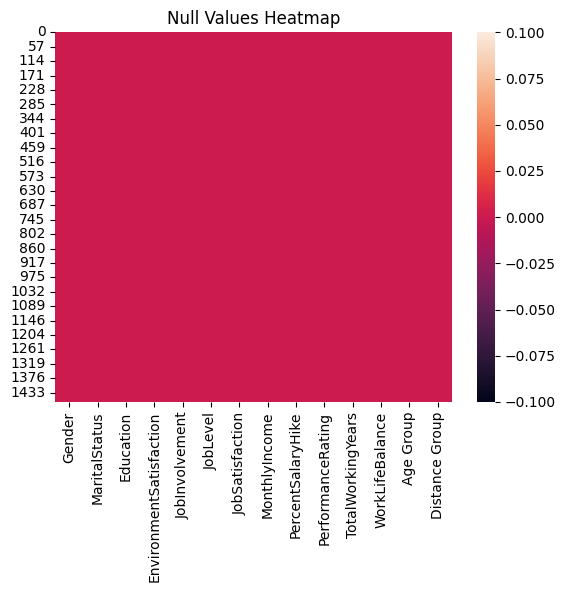

In [ ]:
import matplotlib.pyplot as plt
null_mask = df.isnull()
sns.heatmap(null_mask)
plt.title('Null Values Heatmap')
plt.show()

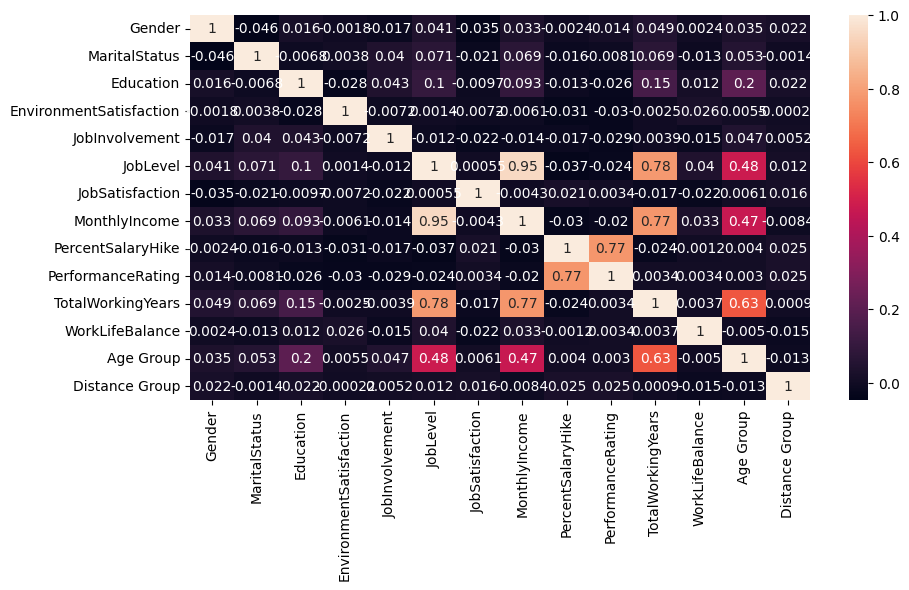

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
corr=df.corr()
plt = sns.heatmap(corr,annot=True)

In [ ]:
df.columns

Index(['Gender', 'MaritalStatus', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'WorkLifeBalance', 'Age Group', 'Distance Group'],
      dtype='object')

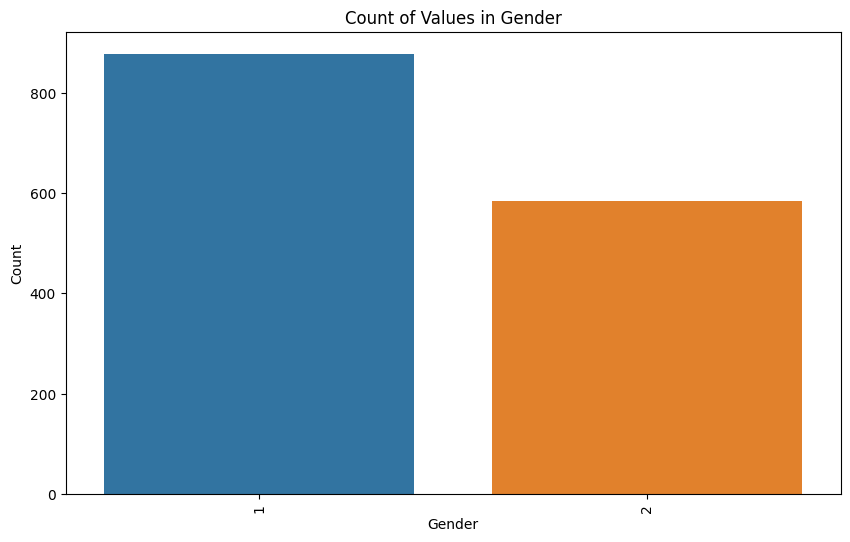

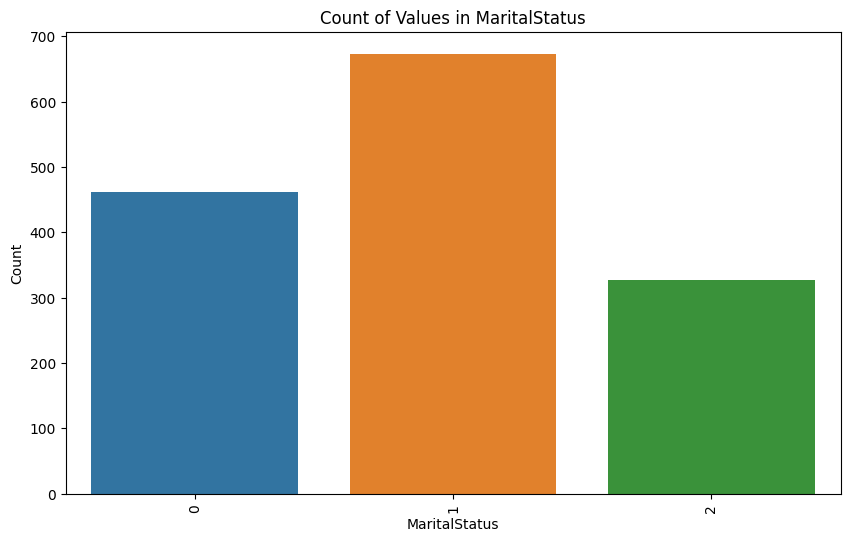

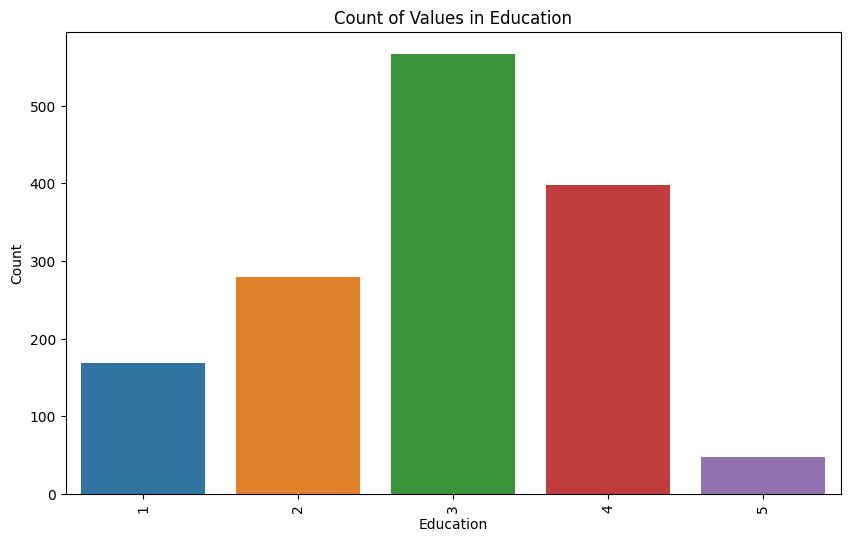

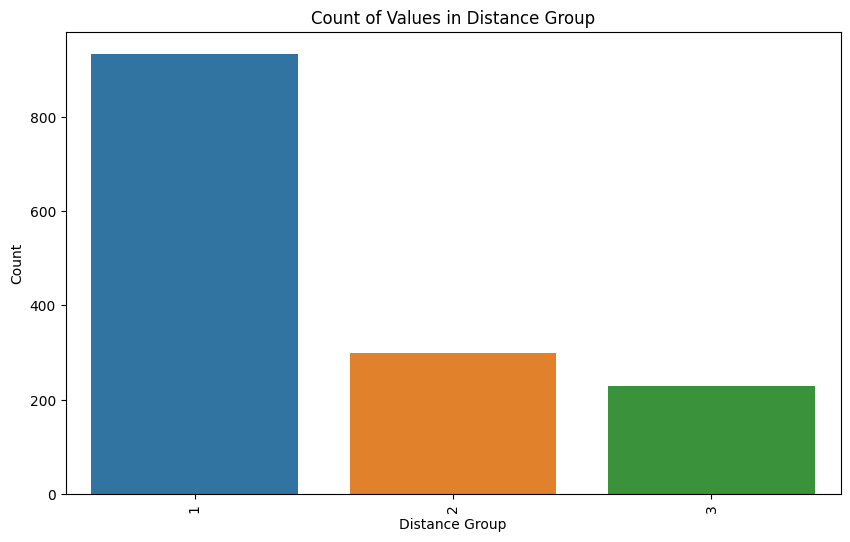

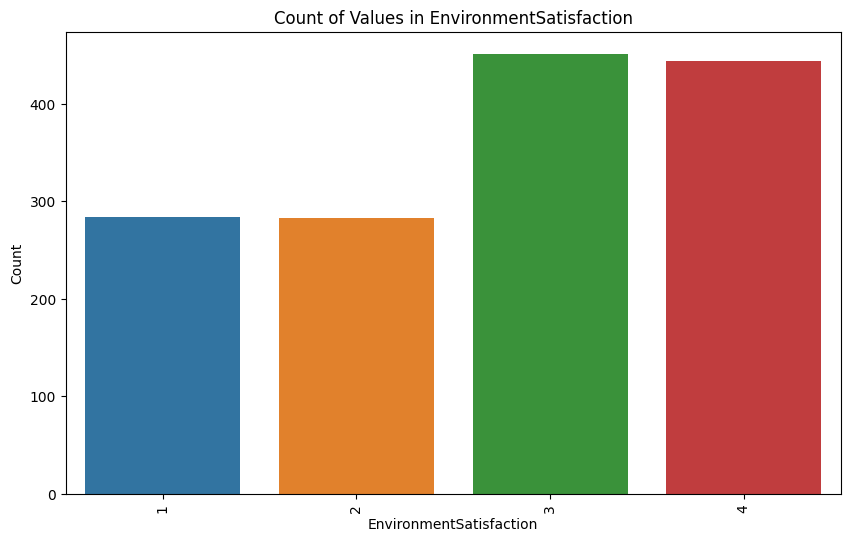

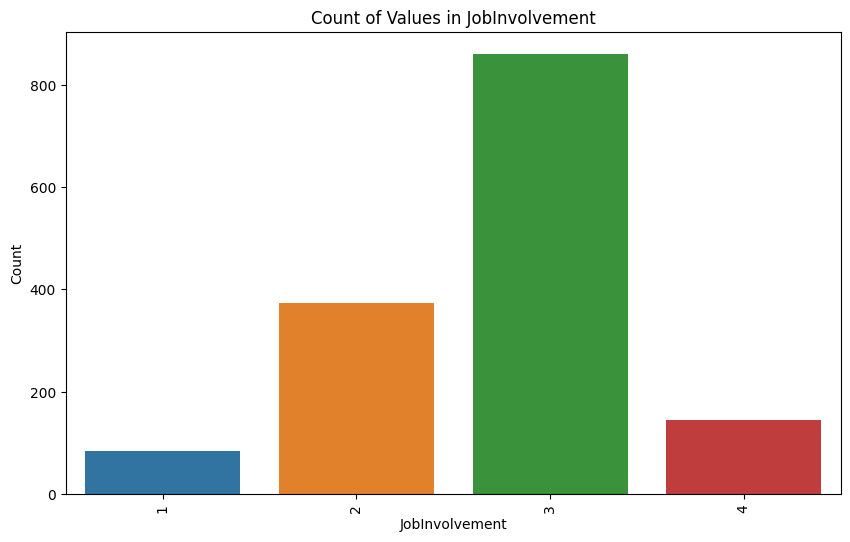

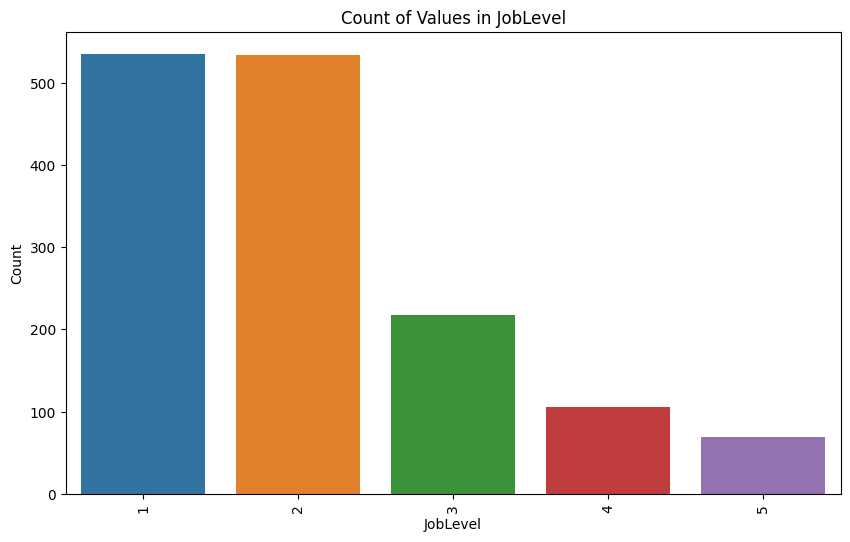

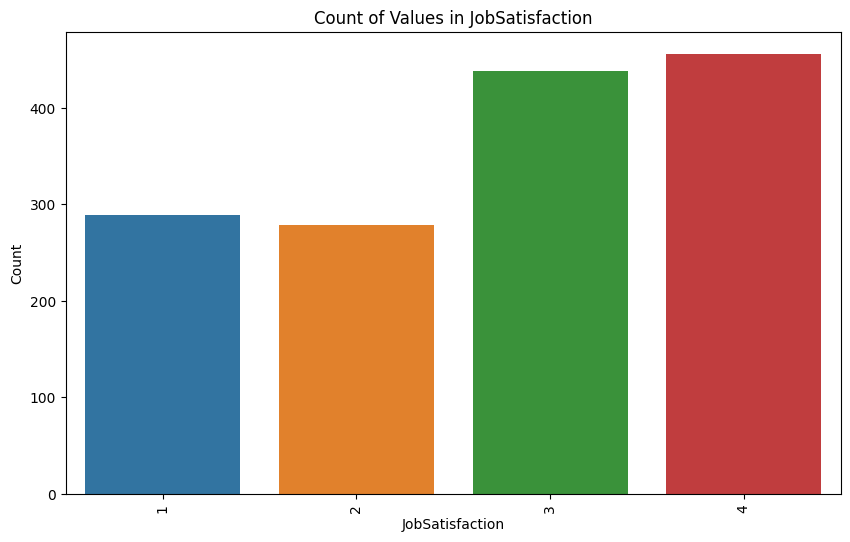

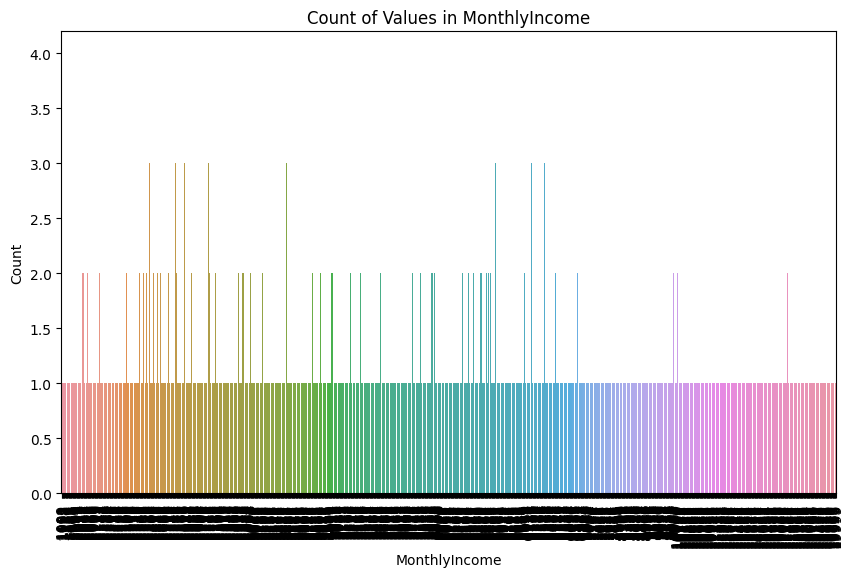

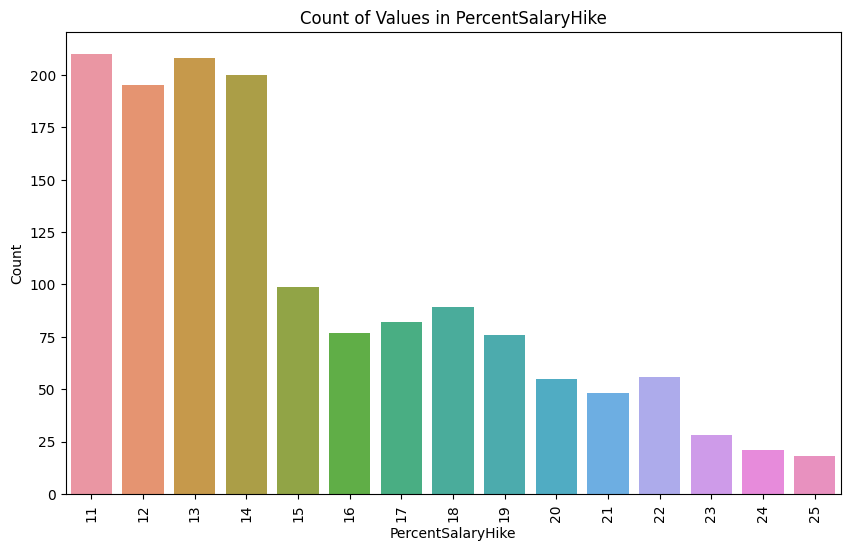

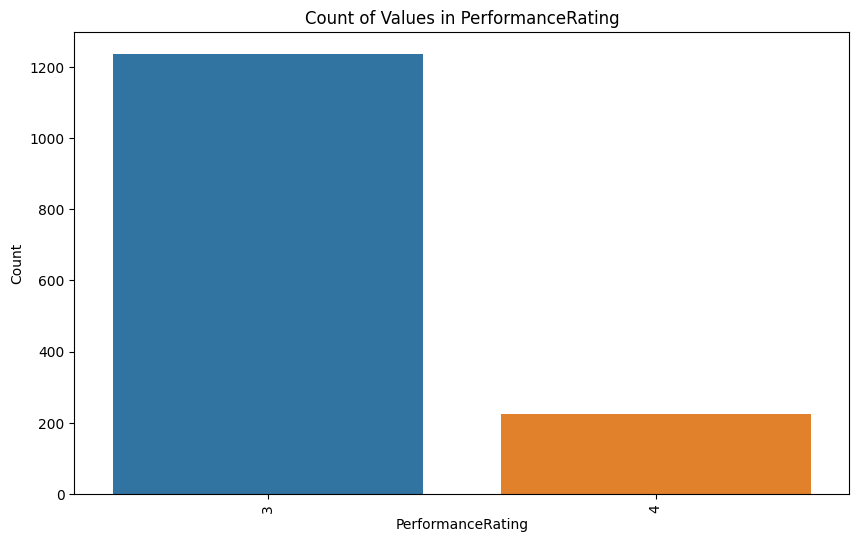

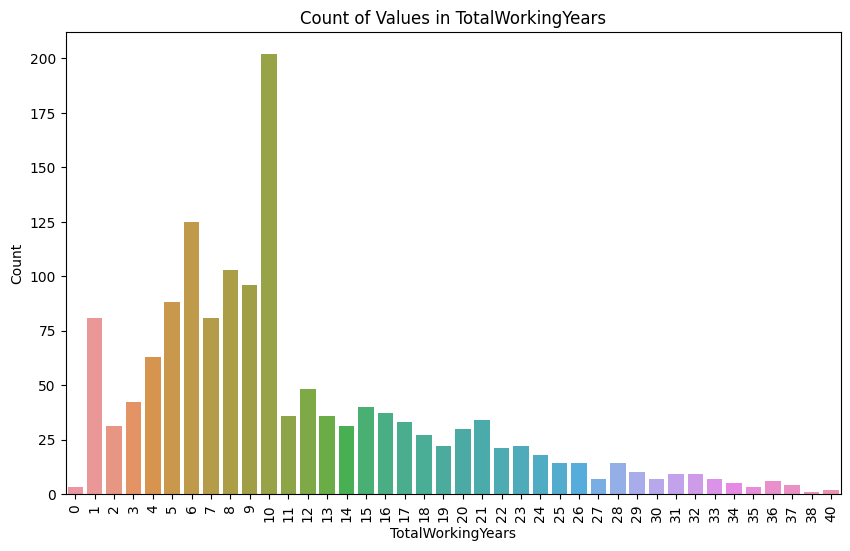

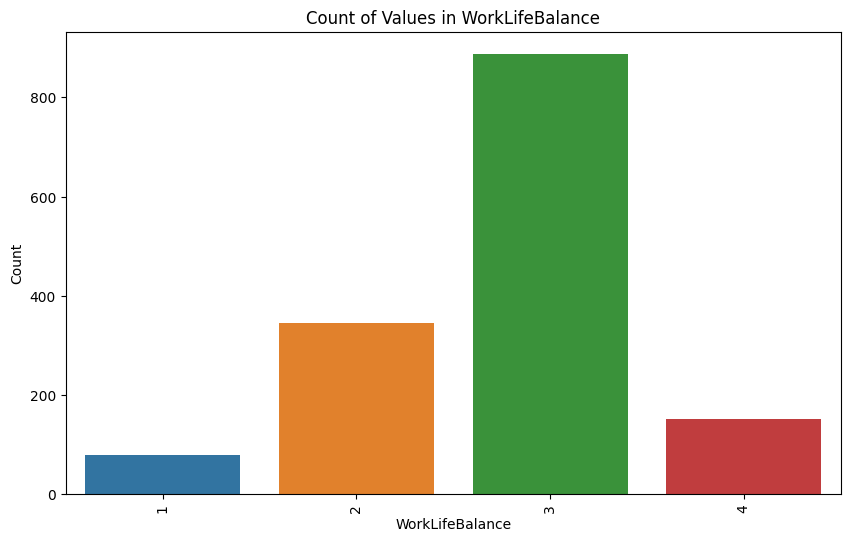

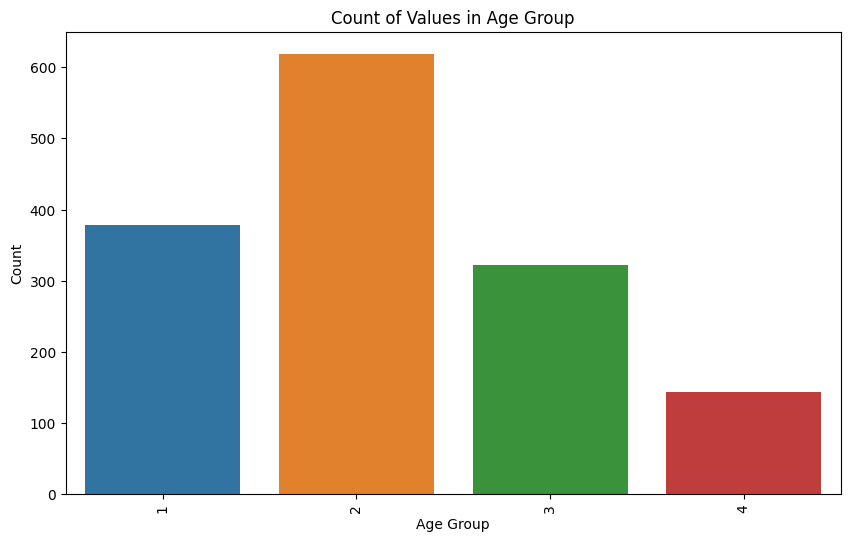

In [ ]:
import matplotlib.pyplot as plt
for variable in ['Gender', 'MaritalStatus', 'Education', 'Distance Group','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome','PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'WorkLifeBalance', 'Age Group']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=variable)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f"Count of Values in {variable}")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [ ]:
# Accessing the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Accessing the principal components
principal_components = pca.components_

In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)

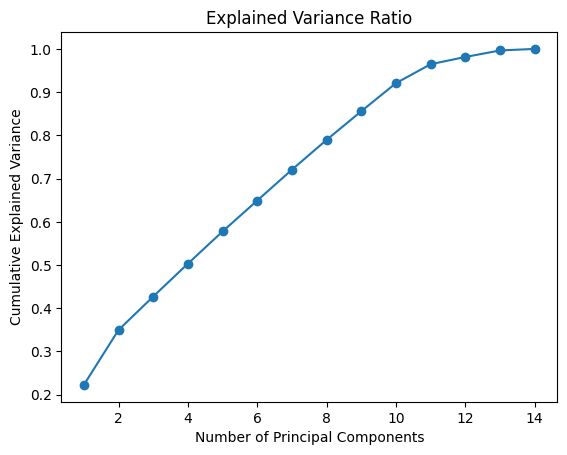

In [ ]:
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

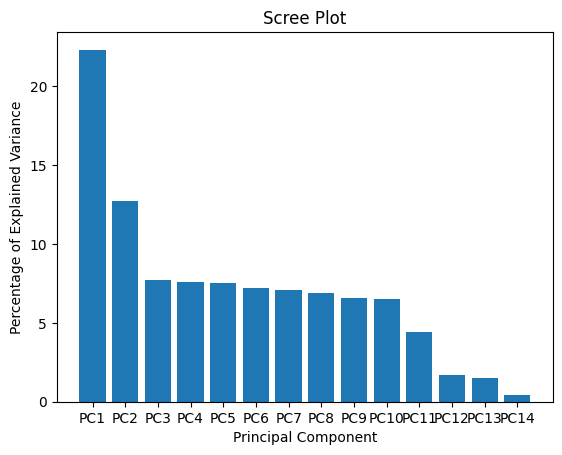

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
selected_components = principal_components[:6]
X_reduced = X.dot(selected_components.T)

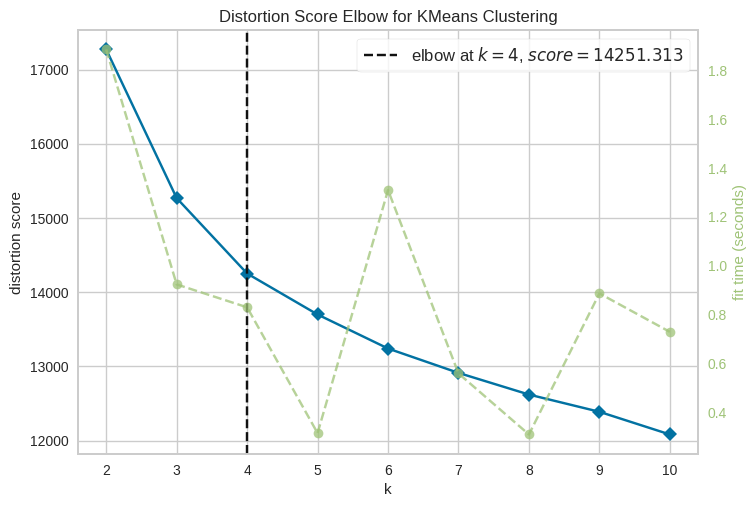

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

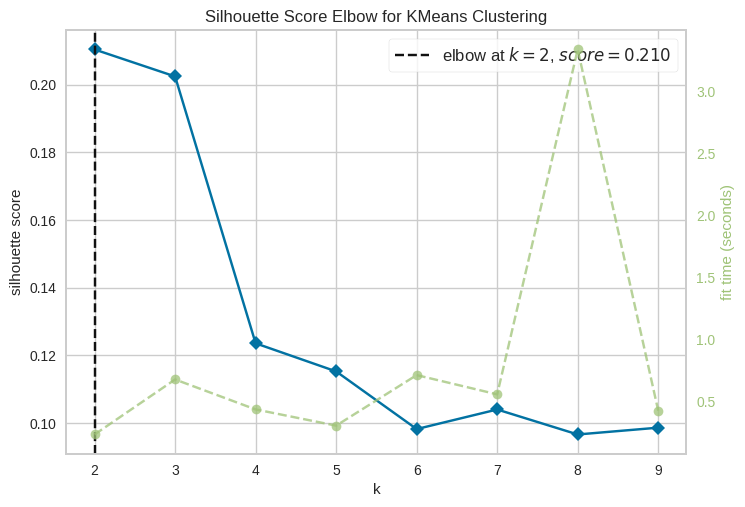

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

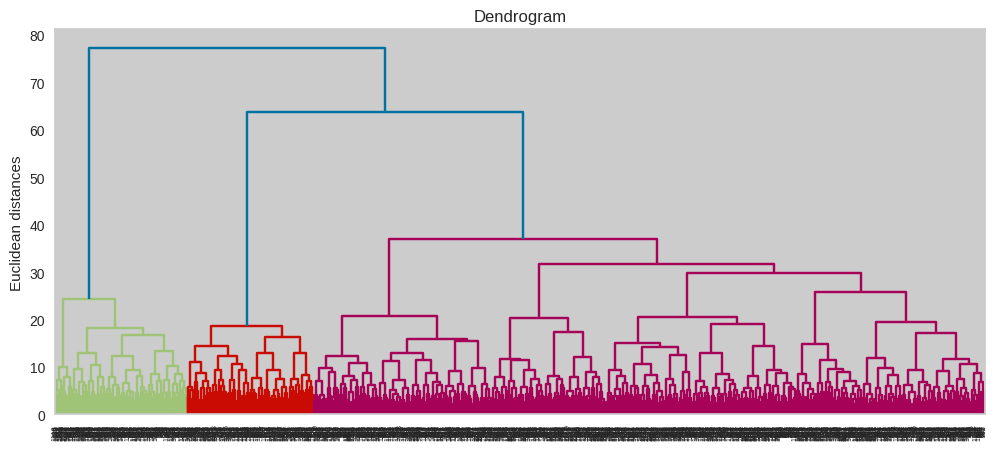

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


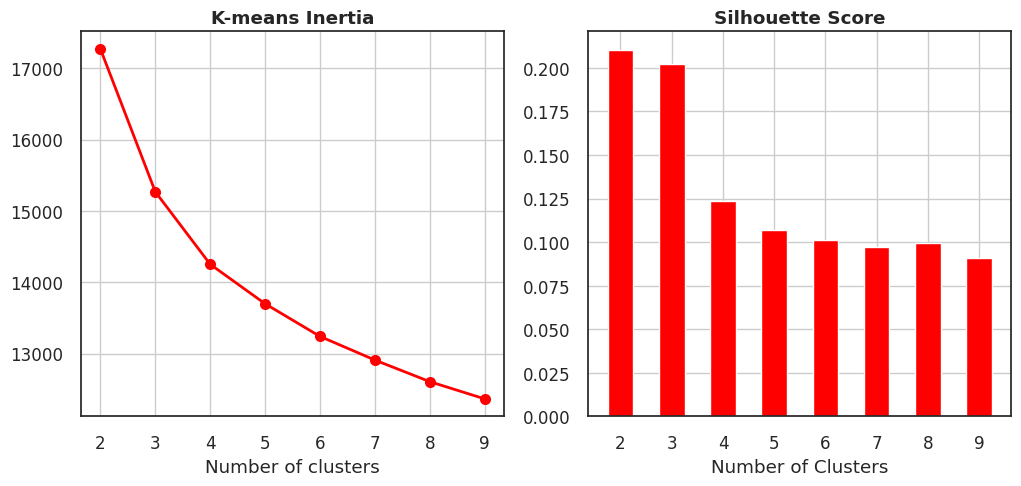

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import silhouette_score

def elbowsil(dataa):
  import sklearn.cluster as cluster
  inertia = []
  for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',n_init=15,random_state=17)
    kmeans.fit(dataa)
    inertia.append(kmeans.inertia_)
    silhouette = {}
  for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',n_init=15,random_state=17)
    kmeans.fit(dataa)
    silhouette[i] = silhouette_score(dataa, kmeans.labels_, metric='euclidean')
  sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})
  plt.subplot(1, 2, 1)
  plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
  plt.xlabel('Number of clusters')
  plt.title('K-means Inertia',fontweight='bold')
  plt.grid(True)
  plt.subplot(1, 2, 2)
  plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
  plt.xticks(range(len(silhouette)), list(silhouette.keys()))
  plt.grid()
  plt.title('Silhouette Score',fontweight='bold')
  plt.xlabel('Number of Clusters')
  plt.show()

elbowsil(X)